<a href="https://colab.research.google.com/github/mafaldasalomao/ocr_recognition/blob/main/OCR_Reconhecimento_de_texto_manuscrito_Treinamento_do_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de modelo próprio para reconhecimento de texto manuscrito



# Importando as bibliotecas

In [1]:
import tensorflow
tensorflow.__version__

'2.12.0'

In [2]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carregando as bases de dados

## Conjunto MNIST 0-9 

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
28 * 28

784

In [7]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [8]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
train_data[0].shape

(28, 28)

In [10]:
train_labels[0]

5

In [11]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [12]:
digitos_data.shape

(70000, 28, 28)

In [13]:
digitos_labels.shape

(70000,)

In [14]:
digitos_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [15]:
np.random.randint(0, digitos_data.shape[0])

59519

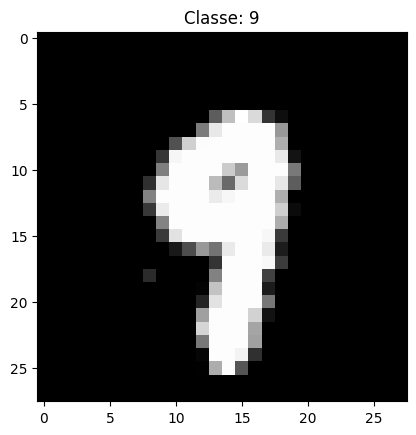

In [16]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

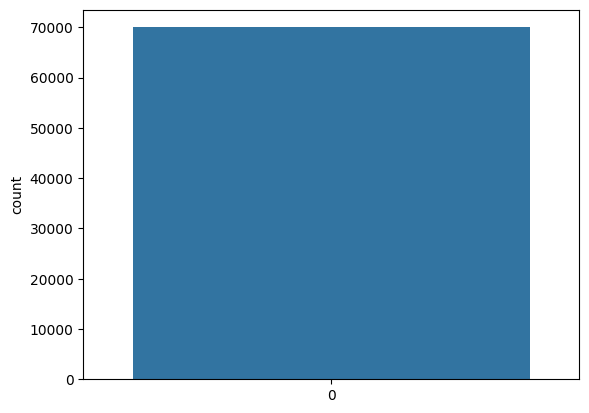

In [17]:
sns.countplot(digitos_labels);

## Conjunto Kaggle A-Z

In [18]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-04-06 21:56:21--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  58.3MB/s    in 4.8s    

2023-04-06 21:56:28 (38.3 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [19]:
zip_object = zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [20]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')

In [21]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [23]:
alfabeto_data.shape, alfabeto_labels.shape

((372450, 784), (372450,))

In [24]:
alfabeto_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [25]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [26]:
alfabeto_data.shape

(372450, 28, 28)

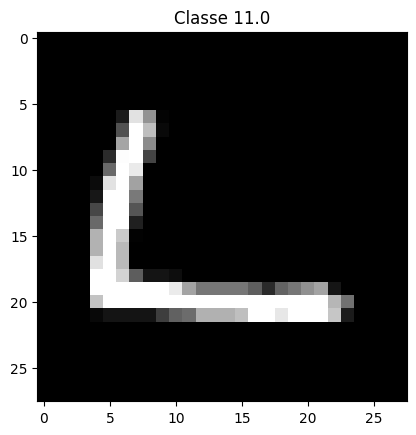

In [27]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]));

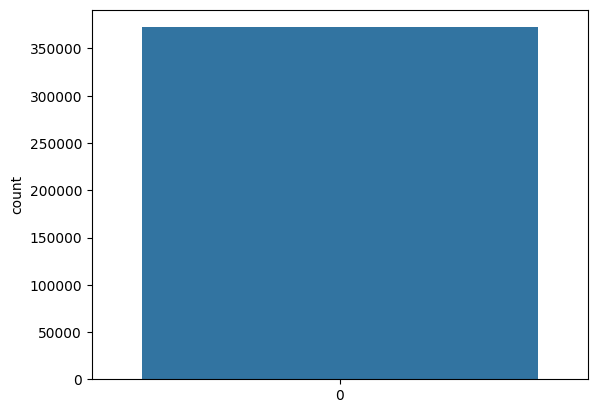

In [28]:
sns.countplot(alfabeto_labels);

## Junção das bases de dados

In [29]:
digitos_labels, np.unique(digitos_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [30]:
alfabeto_labels, np.unique(alfabeto_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [31]:
alfabeto_labels += 10

In [32]:
alfabeto_labels, np.unique(alfabeto_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [33]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [34]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [35]:
data = np.array(data, dtype='float32')

In [36]:
data.shape

(442450, 28, 28)

In [37]:
data = np.expand_dims(data, axis = -1)

In [38]:
data.shape

(442450, 28, 28, 1)

# Pré-processamento dos dados

In [39]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [40]:
data /= 255.0

In [41]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [42]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [43]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [44]:
np.unique(labels)

array([0, 1])

In [45]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
labels[30000], len(labels[30000]), 26 + 10

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36,
 36)

In [ ]:
# OneHotEncoder
# A, B, C, Z
# 0, 1, 2, 25

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [48]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [49]:
classes_total.max()

57825

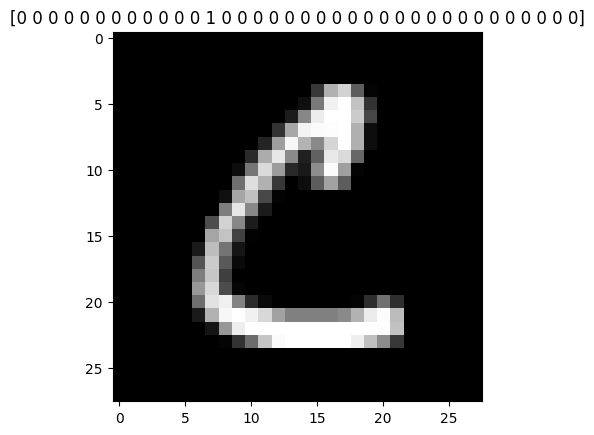

In [50]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [51]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [52]:
classes_peso

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [54]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [55]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Criação da estrutura da rede neural

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [59]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [60]:
2 * 2 * 128

512

In [61]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [62]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [63]:
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Treinamento da rede neural

In [64]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [65]:
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [66]:
len(X_train) // batch_size

2765

In [67]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.3173 - accuracy: 0.8176
Epoch 1: val_loss improved from inf to 0.27649, saving model to manuscrito.model


2765/2765 [==============================] - 133s 43ms/step - loss: 2.3173 - accuracy: 0.8176 - val_loss: 0.2765 - val_accuracy: 0.8970
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0292 - accuracy: 0.8976
Epoch 2: val_loss improved from 0.27649 to 0.21567, saving model to manuscrito.model


2765/2765 [==============================] - 119s 43ms/step - loss: 1.0292 - accuracy: 0.8976 - val_loss: 0.2157 - val_accuracy: 0.9103
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8526 - accuracy: 0.9110
Epoch 3: val_loss did not improve from 0.21567
2765/2765 [==============================] - 114s 41ms/step - loss: 0.8526 - accuracy: 0.9110 - val_loss: 0.2500 - val_accuracy: 0.8979
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7615 - accuracy: 0.9186
Epoch 4: val_loss did not improve from 0.21567
2765/2765 [==============================] - 114s 41ms/step - loss: 0.7615 - accuracy: 0.9186 - val_loss: 0.2400 - val_accuracy: 0.8973
Epoch 5/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.6896 - accuracy: 0.9245
Epoch 5: val_loss did not improve from 0.21567
2765/2765 [==============================] - 113s 41ms/step - loss: 0.6895 - accuracy: 0.9245 - val_loss: 0.2938 - val_accuracy: 0.8735
Epoch 6/20
2764/2765 

2765/2765 [==============================] - 110s 40ms/step - loss: 0.5036 - accuracy: 0.9403 - val_loss: 0.2098 - val_accuracy: 0.9061
Epoch 13/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4832 - accuracy: 0.9427
Epoch 13: val_loss did not improve from 0.20983
2765/2765 [==============================] - 111s 40ms/step - loss: 0.4831 - accuracy: 0.9427 - val_loss: 0.2188 - val_accuracy: 0.9030
Epoch 14/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4768 - accuracy: 0.9437
Epoch 14: val_loss did not improve from 0.20983
2765/2765 [==============================] - 113s 41ms/step - loss: 0.4768 - accuracy: 0.9437 - val_loss: 0.2128 - val_accuracy: 0.9089
Epoch 15/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4570 - accuracy: 0.9442
Epoch 15: val_loss improved from 0.20983 to 0.18438, saving model to manuscrito.model


2765/2765 [==============================] - 115s 42ms/step - loss: 0.4570 - accuracy: 0.9442 - val_loss: 0.1844 - val_accuracy: 0.9273
Epoch 16/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.9445
Epoch 16: val_loss did not improve from 0.18438
2765/2765 [==============================] - 110s 40ms/step - loss: 0.4563 - accuracy: 0.9445 - val_loss: 0.1942 - val_accuracy: 0.9153
Epoch 17/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.9458
Epoch 17: val_loss did not improve from 0.18438
2765/2765 [==============================] - 110s 40ms/step - loss: 0.4475 - accuracy: 0.9458 - val_loss: 0.2040 - val_accuracy: 0.9153
Epoch 18/20
2765/2765 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.9460
Epoch 18: val_loss did not improve from 0.18438
2765/2765 [==============================] - 110s 40ms/step - loss: 0.4403 - accuracy: 0.9460 - val_loss: 0.1923 - val_accuracy: 0.9093
Epoch 19/20
276

2765/2765 [==============================] - 111s 40ms/step - loss: 0.4304 - accuracy: 0.9472 - val_loss: 0.1613 - val_accuracy: 0.9400
Epoch 20/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4213 - accuracy: 0.9481
Epoch 20: val_loss improved from 0.16131 to 0.14196, saving model to manuscrito.model


2765/2765 [==============================] - 114s 41ms/step - loss: 0.4214 - accuracy: 0.9481 - val_loss: 0.1420 - val_accuracy: 0.9467


# Avaliação da rede neural

In [68]:
X_test.shape

(88490, 28, 28, 1)

In [69]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 2ms/step


In [70]:
previsoes

array([[3.5384014e-02, 2.9471835e-11, 1.0465901e-07, ..., 9.0263260e-14,
        8.0183497e-08, 1.0305249e-08],
       [1.5657266e-24, 1.0345524e-13, 1.4732954e-13, ..., 8.4885170e-14,
        1.7654390e-11, 5.3431496e-08],
       [4.4648941e-11, 1.2263677e-15, 1.5187970e-18, ..., 4.9188497e-17,
        7.1629002e-15, 4.1396797e-20],
       ...,
       [4.2683417e-01, 9.9388132e-08, 1.8352437e-05, ..., 3.2843407e-12,
        1.3504828e-07, 7.9747672e-08],
       [5.1976661e-17, 3.1948202e-13, 8.3794149e-08, ..., 9.9670780e-01,
        5.0994848e-05, 6.0242467e-10],
       [1.0484820e-09, 9.4038718e-33, 1.2623950e-12, ..., 2.6383587e-31,
        6.7512000e-17, 6.2349946e-14]], dtype=float32)

In [71]:
previsoes[0]

array([3.53840142e-02, 2.94718347e-11, 1.04659009e-07, 4.68185046e-10,
       5.24435650e-09, 2.29270380e-08, 6.80417043e-06, 1.03567615e-11,
       2.56778151e-07, 7.07398613e-07, 2.11162615e-06, 8.66450250e-07,
       8.90124356e-05, 2.22419086e-03, 5.82876623e-07, 1.71395198e-16,
       2.65839662e-06, 5.92659144e-10, 6.37537245e-12, 9.37821096e-06,
       1.58285218e-10, 1.48728333e-07, 2.69056368e-08, 1.46649463e-05,
       9.60523903e-01, 3.99504992e-04, 1.27453310e-03, 3.57353969e-08,
       5.24368397e-06, 1.08359171e-08, 4.07890220e-05, 3.35466932e-11,
       2.02885658e-05, 9.02632596e-14, 8.01834972e-08, 1.03052491e-08],
      dtype=float32)

In [72]:
len(previsoes[0])

36

In [73]:
np.argmax(previsoes[0])

24

In [74]:
nomes_labels[24]

'O'

In [75]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
np.argmax(y_test[0])

24

In [77]:
nomes_labels[np.argmax(y_test[0])]

'O'

In [78]:
rede_neural.evaluate(X_test, y_test)

2766/2766 [==============================] - 8s 3ms/step - loss: 0.1420 - accuracy: 0.9467


[0.1419617384672165, 0.946694552898407]

In [79]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

              precision    recall  f1-score   support

           0       0.34      0.83      0.48      1381
           1       0.98      0.99      0.98      1575
           2       0.93      0.97      0.95      1398
           3       0.95      0.99      0.97      1428
           4       0.93      0.97      0.95      1365
           5       0.63      0.95      0.75      1263
           6       0.95      0.97      0.96      1375
           7       0.97      0.99      0.98      1459
           8       0.94      0.99      0.96      1365
           9       0.98      0.98      0.98      1392
           A       1.00      0.99      0.99      2774
           B       0.99      0.97      0.98      1734
           C       0.99      0.98      0.98      4682
           D       0.92      0.97      0.95      2027
           E       0.99      0.99      0.99      2288
           F       0.98      1.00      0.99       233
           G       0.94      0.97      0.95      1152
           H       0.97    

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

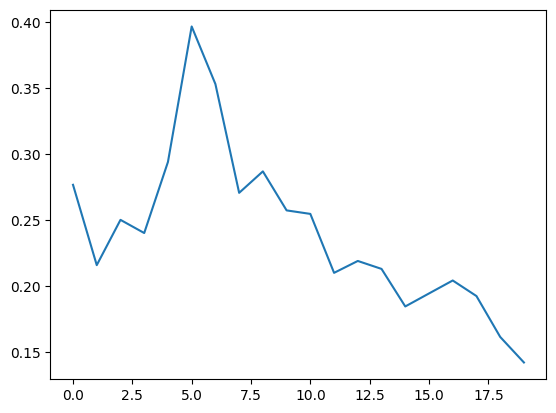

In [81]:
plt.plot(history.history['val_loss']);

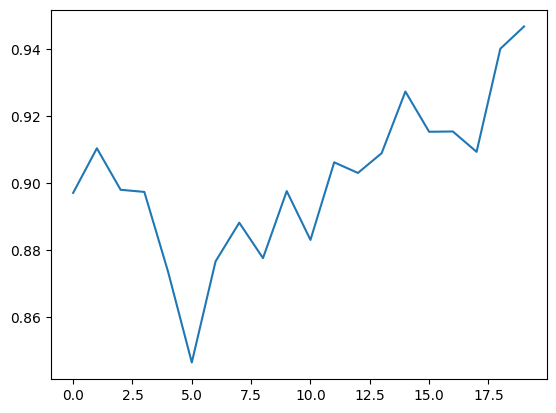

In [82]:
plt.plot(history.history['val_accuracy']);

# Salvando o modelo no Google Drive

In [83]:
rede_neural.save('rede_neural', save_format='h5')

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
!cp rede_neural /content/drive/MyDrive/Pesquisas/OCR_recognition/OCR com Python/Modelos/rede_neural

cp: target 'Python/Modelos/rede_neural' is not a directory


# Teste com imagens

In [87]:
from tensorflow.keras.models import load_model

In [88]:
rede_neural_carregada = load_model('/content/drive/MyDrive/Pesquisas/OCR_recognition/OCR com Python/Modelos/rede_neural')

In [89]:
rede_neural_carregada

In [90]:
rede_neural_carregada.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [93]:
from google.colab.patches import cv2_imshow
img = cv2.imread('letra-m.jpg')
cv2_imshow(img)

In [94]:
img.shape

(30, 30, 3)

In [95]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

In [96]:
cv2_imshow(gray)

In [97]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [98]:
val

137.0

In [99]:
thresh.shape

(30, 30)

In [100]:
img = cv2.resize(thresh, (28, 28))
cv2_imshow(img)

In [101]:
img.shape

(28, 28)

In [102]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [103]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [104]:
previsao = rede_neural_carregada.predict(img)

1/1 [==============================] - 0s 208ms/step


In [105]:
previsao

array([[2.0062682e-11, 5.9469542e-08, 1.1156127e-12, 2.1885691e-18,
        6.0503919e-07, 3.5318790e-11, 2.6769245e-09, 3.3855621e-10,
        1.2069452e-10, 4.0685291e-10, 4.5820461e-06, 2.7296020e-13,
        1.1984695e-09, 5.9589814e-07, 1.8497828e-09, 5.7601285e-19,
        7.6366518e-08, 9.8061610e-06, 2.1833852e-23, 1.3648921e-12,
        8.5764626e-08, 1.9065966e-11, 9.9934083e-01, 4.2394991e-04,
        3.6781342e-10, 1.7583781e-09, 6.3283170e-11, 4.1675881e-09,
        5.6972464e-08, 1.0581859e-10, 5.4059488e-05, 2.1205656e-15,
        1.6522809e-04, 1.0793475e-09, 8.6997898e-10, 5.7425102e-12]],
      dtype=float32)

In [106]:
np.argmax(previsao)

22

In [107]:
nomes_labels[22]

'M'